#### <목차>
- 

#### <요약>
- 

#### 1. Node란?
- NodeJs는 크롬 v8 자바스크립트 엔진으로 빌드된 **자바스크립트 런타임**입니다. NodeJs는 이벤트 기반, 논블로킹 I/O 모델을 사용해 가볍고 효율적입니다.
- NojeJS 패키지 생태계인 npm은 세계에서 가장 큰 오픈소스 라이브러리 생태계이기도 합니다.
- 노드는 자바스크립트 어플리케이션이 서버로서 기능하기 위한 도구를 제공한다.

- 기존에는 자바스크립트 프로그램을 인터넷 브라우저에서만 실행할 수 있었으나, 노드는 자바스크립트 프로그램을 컴퓨터에서 실행할 수 있게 해준다.
- 라이언 달(Ryan Dahl)은 크롬의 V8 엔진과 libuv 라이브러리를 이용해 노드 프로젝트를 시작하였다.
  (V8 엔진과 libuv 라이브러리는 C/C++로 구현되어 있다)
  
※ V8: 오픈소스 자바스크립트 엔진, 크롬에 사용  
※ libuv: 이벤트 기반, 비동기 논블로킹 I/O 모델 제공 라이브러리

#### 1-1. 알아야할 개념  
<span style="color:yellowgreen"> 이벤트 루프 </span>: 이벤트 발생 시 호출할 콜백 함수들을 관리하고, 호출된 콜백 함수의 실행 순서를 결정하는 역할을 담당.    노드가 종료될 때까지 이벤트 처리를 위한 작업을 반복하므로 루프라고 불린다.
  
<span style="color:yellowgreen"> 테스크 큐(콜백 큐) </span>: 이벤트 발생 후 호출되어야 할 콜백 함수들이 기다리는 공간. 이벤트 루트가 정한 순서대로 줄을 서 있어 콜백 큐라고도 부른다. 

<span style="color:yellowgreen"> 백그라운드 </span>: 타이머나 I/O 작업 콜백 또는 이벤트 리스너들이 대기하는 곳  

※ 자바 스크립트는 단일 스레드이다. 즉, 호출 스택이 하나로(단일 호출 스택) 동시에 하나의 작업만 처리할 수 있다.  
  
※ 자바 스크립트를 구동하는 환경(웹 브라우저, NodeJS)는 여러 스레드가 사용되지만, 단일 호출 스택을 사용하는 자바스크립트 엔진과 상호 연동하기 위한 장치가 '이벤트 루프' 이다.

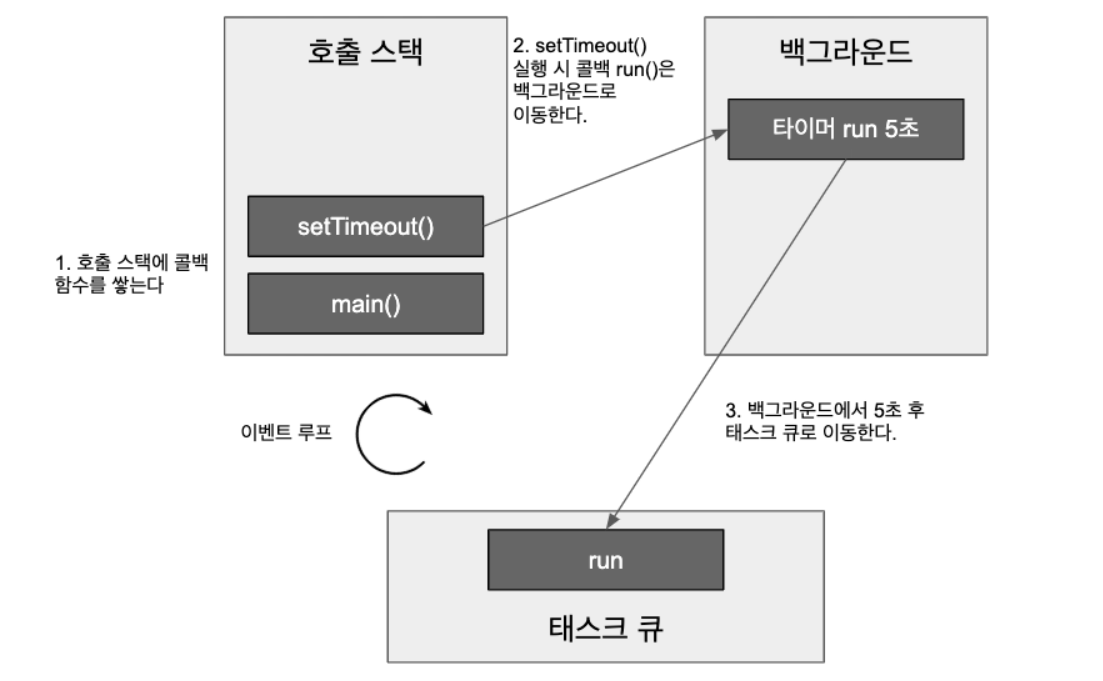

In [ ]:
function run() {
    console.log('3초 후 실행');
}
console.log('시작');
setTimeout(run, 3000);
console.log('끝');

#### 1-2. 실행 순서
1. 호출 스택 들어간 반대 순서로 실행 되므로 setTimeout() 먼저 실행  
2. setTimeout() 실행되면, 콜백 run()은 백그라운드로 보내고, 호출 스택에서 빠진다.
3. <span style="color:yellowgreen"> 백그라운드에서는 3s를 카운트 하고 </span>, run 함수를 테스크 큐로 보낸다.
   (실제로는 테스트 큐도 아래 그림 처럼 여러개의 큐로 구성되어 있다.)
4. <span style="color:yellowgreen"> 호출 스택이 비워지면 </span>, 테스크 큐에서 함수를 가져와 호출 스택에 넣고 실행한다.  
5. 이벤트 루프는 테스크 큐에 콜백함수가 들어올 때 까지 큐를 감시한다.
  
==>   
<span style="color:yellow"> ★★★ 다수의 큐를 이용한 것이 (단일 호출 스택을 사용하더라도) 동시성을 지원하는 것처럼 보이게 한다.  
 눈여겨 봐야할 점은 호출 스택이 비워지면(!), 이벤트 루프가 테스크 큐의 콜백을 호출 스택으로 올린다는 것이다. </span>

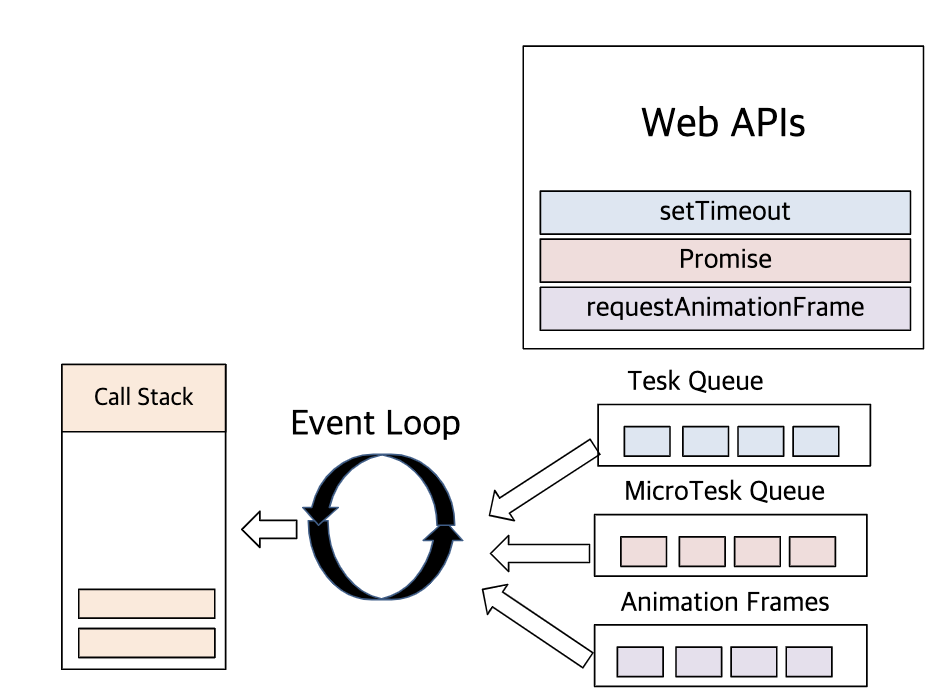

#### 1-3. WebAPI 엿보기
1. Task Queue 에는 setTimeout, setInterval의 콜백 함수가 쌓인다.  
2. Microtask Queue 에는 Promise callback, async callback과 같은 콜백 함수가 쌓인다.  
3. Animation Frames 에는 requestAnimationFrame과 같은 콜백 함수가 쌓인다.  

#### 2-1. 논블로킹 I/O
- 이전 작업이 완료될 때 까지 멈추지 않고 다음 작업을 수행하는 방식이 논 블로킹 방식이다.
- 위에서 본 이벤트 루프와 큐, 백그라운드를 활용한 방식이 논 블로킹 방식이다.  
  (오래 걸리는 함수를 백그라운드로 보내서 테스크 큐를 거쳐 호출 스택으로 올라오게 하였다)  
==> <span style="color:yellow"> 즉, 백그라운드 작업이 끝나야(e.g. run 함수) 호출한 함수(e.g. run 함수를 호출하는 함수)를 return하는 블로킹 방식과 달리, 백그라운드 작업 완료 여부를 확인하지 않는다. </span>